In [30]:
import QuantLib as ql
import numpy as np
import math

In [31]:
import matplotlib.pyplot as plt
% matplotlib inline

In [32]:
def callpayoff(S):
    if S >= K:
        return S - K
    else:
        return 0
def putpayoff(S):
    if S <= K:
        return K - S
    else:
        return 0

In [19]:
pathNum = int(input('請輸入要模擬的路徑數量:'))
maturity = int(input('請輸入到期年數:'))
sigma = float(input('請輸入波動率(sigma):'))
fwr = float(input('請輸入遠期利率:'))
r = float(input('請輸入無風險年利率:'))
K = float(input('請輸入履約價格:'))
a = float(input('請輸入Hull-White內的a:'))
steps = int(input('請輸入欲模擬步數:'))
day_count = ql.Thirty360()
today = ql.Date(5,12,2020)

請輸入要模擬的路徑數量:10
請輸入到期年數:30
請輸入波動率(sigma):0.1
請輸入遠期利率:0.05
請輸入無風險年利率:0.05
請輸入履約價格:1
請輸入Hull-White內的a:0.1
請輸入欲模擬步數:360


In [33]:
ql.Settings.instance().evaluationDate = today

spot_curve = ql.FlatForward(today, ql.QuoteHandle(ql.SimpleQuote(fwr)), day_count)
spot_curve_handle = ql.YieldTermStructureHandle(spot_curve)

In [34]:
hull_white = ql.HullWhiteProcess(spot_curve_handle, a, sigma)
rng = ql.GaussianRandomSequenceGenerator(ql.UniformRandomSequenceGenerator(steps, ql.UniformRandomGenerator()))
seq = ql.GaussianPathGenerator(hull_white, maturity, steps, rng, False)

In [35]:
def one_path(i, steps):
    sample_path = seq.next()
    path = sample_path.value()
    value = [path[j] for j in range(len(path))]
    return value

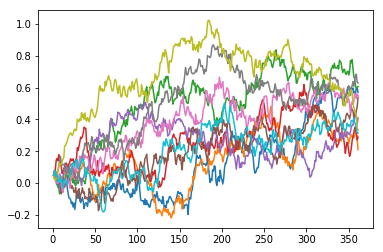

In [36]:
call = []
put = []
fig = plt.figure()
step = []
for i in range(steps+1):
    step.append(i+1)
for i in range(pathNum):
    path = one_path(i, steps)
    plt.plot(step, path)
    call.append(callpayoff(path[steps-1]))
    put.append(putpayoff(path[steps-1]))
call = np.array(call)
put = np.array(put)
mean_call = np.mean(call)
mean_put = np.mean(put)

In [37]:
ans_call = mean_call/math.exp(maturity*r)
ans_put = mean_put/math.exp(maturity*r)

In [38]:
print('call的合理價格為:', mean_call)
print('put的合理價格為:', mean_put)

call的合理價格為: 0.0
put的合理價格為: 0.5554532686827243
